# Window Aggregation Experiments

<h2>Setting up</h2>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Experiment 1</h3>

In [47]:
DF = pd.read_csv('../setups/exp1-flat.csv',delimiter=';', index_col=[0])
DF

,AGG-PAIRS-L-MERGE,AGG-PAIRS-E-MERGE,AGG-B2B-L-MERGE,AGG-B2B-E-MERGE,AGG-GEN-L-MERGE,AGG-GEN-E-MERGE,AGG-PAIRS-L-UPDATE,AGG-PAIRS-E-UPDATE,AGG-B2B-L-UPDATE,AGG-B2B-E-UPDATE,AGG-GEN-L-UPDATE,AGG-GEN-E-UPDATE,RED-PAIRS-L,RED-PAIRS-E,RED-B2B-L,RED-B2B-E,RED-GEN-L,RED-GEN-E,MAXB-PAIR-L,MAXB-PAIR-E,MAXB-B2B-L,MAXB-B2B-E,MAXB-GEN-L,MAXB-GEN-E,AVGB-PAIR-L,...,AVGB-B2B-L,AVGB-B2B-E,AVGB-GEN-L,AVGB-GEN-E,PARTIALS-PAIR-L,PARTIALS-PAIR-E,PARTIALS-B2B-L,PARTIALS-B2B-E,PARTIALS-GEN-L,PARTIALS-GEN-E,AVGCPU-PAIR-L,AVGCPU-PAIR-E,AVGCPU-B2B-L,AVGCPU-B2B-E,AVGCPU-GEN-L,AVGCPU-GEN-E,TOTALCPU-PAIR-L,TOTALCPU-PAIR-E,TOTALCPU-B2B-L,TOTALCPU-B2B-E,TOTALCPU-GEN-L,TOTALCPU-GEN-E,MAXB-NO,AVGB-NO,RED-NO
#QUERIES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9252,4626,4626,4626,62446374,62435,32381251,32399756,32385878,32385878,0,858082771,32390503,32404382,32390504,32390504,62446374,858145206,4,7,4,7,16384,32767,4.0,...,3.0,5.0,2977.454545,5953.909091,9255,9255,4628,4628,32390506,32390506,224,220,217,217,633,4367,7281250000,7156250000,7031250000,7046875000,20515625000,"1,41469E+11",1024,290,62446374
10,2914337,470730,1855827,464722,1512769315,1252443,32325724,32762850,32349169,32611235,0,922680786,35240061,33233580,34204996,33075957,1512769315,923933229,64,127,32,63,32768,65535,24.8,...,15.0,29.0,5460.000000,10919.000000,64782,64782,41337,41337,32390506,32390506,419,395,348,357,5998,5417,13593750000,12796875000,11281250000,11578125000,"1,94281E+11","1,75484E+11",10240,2900,624463740
20,4376711,701422,2987872,715069,2272125935,1918268,32325724,32762850,32346225,32622505,0,922680786,36702435,33464272,35334097,33337574,2272125935,924599054,64,127,32,63,32768,65535,24.8,...,15.0,29.0,5460.000000,10919.000000,64782,64782,44281,44281,32390506,32390506,631,622,497,497,8858,5778,20468750000,20171875000,16125000000,16125000000,"2,86938E+11","1,87156E+11",20480,5800,1248927480
40,10188061,1593907,8122743,1451464,5315777522,4457785,32325724,32789298,32338151,32737249,0,922652786,42513785,34383205,40460894,34188713,5315777522,927110571,64,127,64,127,32768,65535,24.8,...,24.8,48.6,5460.000000,10919.000000,64782,64782,52355,52355,32390506,32390506,1321,1308,768,759,18819,6448,42812500000,42390625000,24906250000,24609375000,"6,09578E+11","2,08875E+11",40960,11600,2497854960


In [48]:
# Style parameters
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 50)

<h2>Part I</h2> 
<h3>No_aggregation vs aggregation</h3>

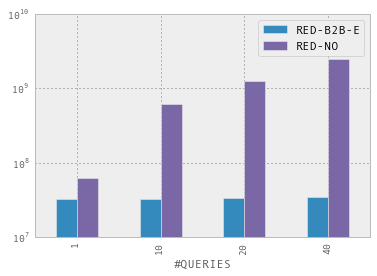

In [49]:
#Comparing Number of Aggregates
DF[['RED-B2B-E','RED-NO']].plot(kind='bar', logy = True)

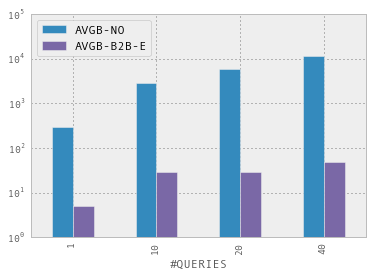

In [50]:
#Comparing Allocated (Memory) Resources
#Aggregates are not enough of an argument since multi-query execution can be potentially parallelized
#The real impact can be seen in the amount of resources allocated- notice that this is logarithmic scale!

DF[['AVGB-NO','AVGB-B2B-E']].plot(kind='bar', logy = True)

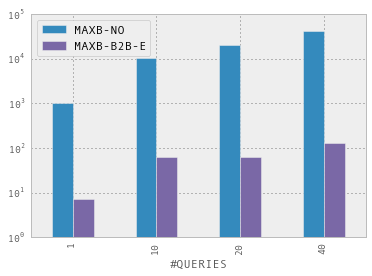

In [51]:
DF[['MAXB-NO','MAXB-B2B-E']].plot(kind='bar', logy = True)

<h3>Time & number of Aggregation Calls</h3>

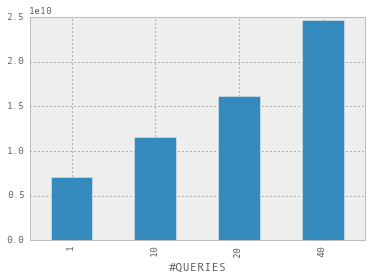

In [73]:
#DF['TOTALCPU-B2B-E'].plot()
DF['TOTALCPU-B2B-E'].plot(kind='bar')

(32000000, 35000000)

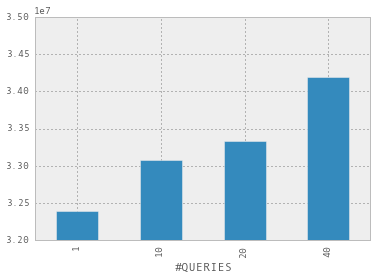

In [53]:
#ax = DF['RED-B2B-E'].plot()
ax = DF['RED-B2B-E'].plot(kind='bar')
ax.set_ylim(32000000,35000000)

<h2>Part II</h2> 
<h3>Periodic Query Comparison - Pairs vs B2B</h3>

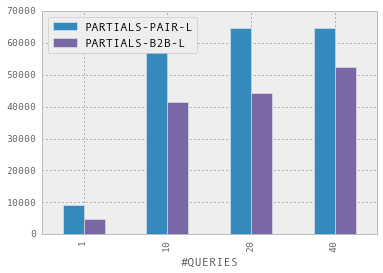

In [54]:
#Comparing Number of Generated Partials
DF[['PARTIALS-PAIR-L','PARTIALS-B2B-L']].plot(kind='bar')

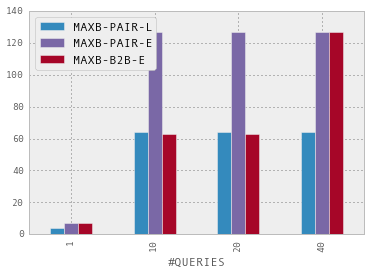

In [55]:
#Comparing Memory Requirements

#MAX MEMORY BUGGER ALLOCATED
DF[['MAXB-PAIR-L','MAXB-PAIR-E','MAXB-B2B-E']].plot(kind='bar')

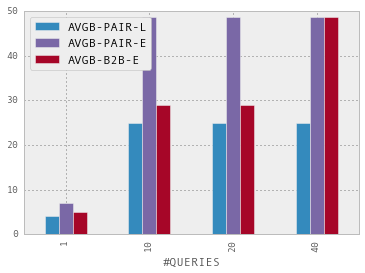

In [56]:
#MAX MEMORY BUFFERS ALLOCATED
DF[['AVGB-PAIR-L','AVGB-PAIR-E','AVGB-B2B-E']].plot(kind='bar')

(29600000, 43000000)

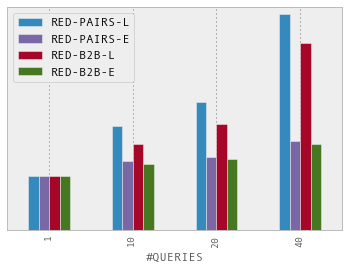

In [79]:
#Comparing Aggregation Calls

#ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', logy=True)
ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-L','RED-B2B-E']].plot(kind='bar', logy=True)
ax.set_ylim(29600000,43000000)

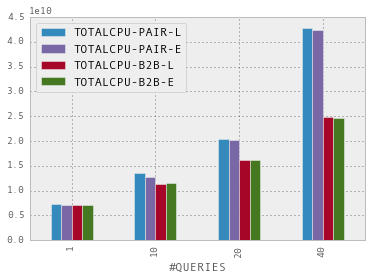

In [76]:
#Comparing Execution Time

#ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', logy=True)
ax = DF[['TOTALCPU-PAIR-L','TOTALCPU-PAIR-E','TOTALCPU-B2B-L','TOTALCPU-B2B-E']].plot(kind='bar', logy=True)

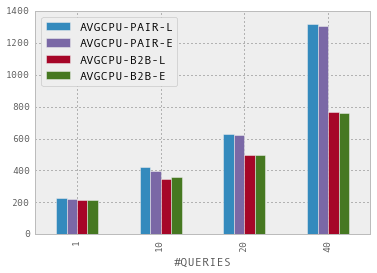

In [77]:
#Comparing Average Execution Time

ax = DF[['AVGCPU-PAIR-L','AVGCPU-PAIR-E','AVGCPU-B2B-L','AVGCPU-B2B-E']].plot(kind='bar')

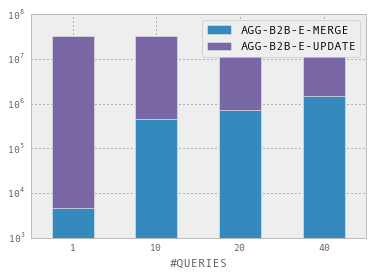

In [60]:
# TESTING STACKED FOR AGGREGATES AND UPDATES
df_b2b_agg = DF[['AGG-B2B-E-MERGE','AGG-B2B-E-UPDATE']]
df_b2b_agg.plot(kind='bar', stacked=True, logy=True, rot=1)

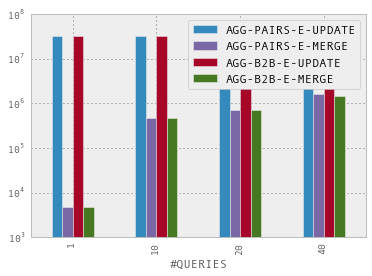

In [81]:
df_b2b_agg = DF[['AGG-PAIRS-E-UPDATE','AGG-PAIRS-E-MERGE','AGG-B2B-E-UPDATE','AGG-B2B-E-MERGE']].plot(kind='bar', logy=True)
#FIXME - STACK MERGES AND UPDATES PER TECHNIQUE

<h2>Part III</h2> 
<h3>Comparing General vs B2B Shared Aggregation on periodic queries</h3>
Here we just generate similar experiments to compare general aggregation with flatfat and b2b aggregation. Comparing general aggregation vs b2b should be mainly shown for non-periodic queries (see next part). This part is just for us, to reason a bit about the results and get a complete picture.


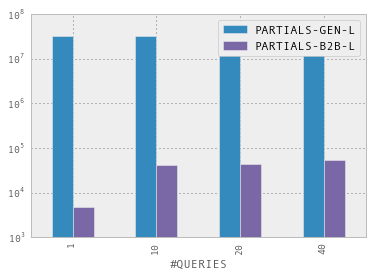

In [62]:
#Comparing Number of Generated Partials - LOGARITHMIC SCALE
DF[['PARTIALS-GEN-L','PARTIALS-B2B-L']].plot(kind='bar', logy=True)

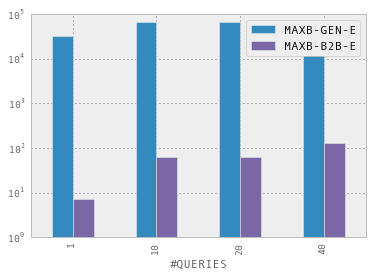

In [63]:
#MAX MEMORY BUGGER ALLOCATED
DF[['MAXB-GEN-E','MAXB-B2B-E']].plot(kind='bar', logy=True)

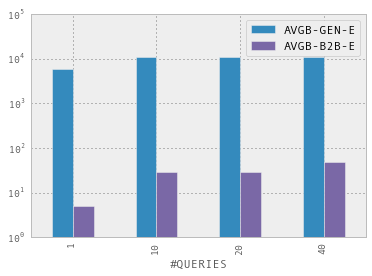

In [64]:
#NOT SO GOOD TO SHOW
#MAX MEMORY BUFFERS ALLOCATED
DF[['AVGB-GEN-E','AVGB-B2B-E']].plot(kind='bar', logy=True)

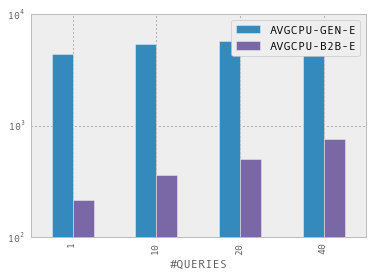

In [65]:
#Comparing Execution Time

#ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', logy=True)
ax = DF[['AVGCPU-GEN-E','AVGCPU-B2B-E']].plot(kind='bar', logy=True)
#ax.set_ylim(38545954000, 91545954000)

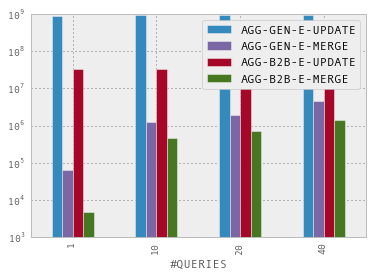

In [66]:
df_b2b_agg = DF[['AGG-GEN-E-UPDATE','AGG-GEN-E-MERGE','AGG-B2B-E-UPDATE','AGG-B2B-E-MERGE']].plot(kind='bar', logy=True)
#FIXME - STACK MERGES AND UPDATES PER TECHNIQUE

<h3>Experiment 2</h3>

In [67]:
DF2 = pd.read_csv('../setups/exp2-flat.csv',delimiter=';', index_col=[0])
DF2

,AGG-B2B-L-MERGE,AGG-B2B-E-MERGE,AGG-GEN-L-MERGE,AGG-GEN-E-MERGE,AGG-B2B-L-UPDATE,AGG-B2B-E-UPDATE,AGG-GEN-L-UPDATE,AGG-GEN-E-UPDATE,RED-B2B-L,RED-B2B-E,RED-GEN-L,RED-GEN-E,MAXB-B2B-L,MAXB-B2B-E,MAXB-GEN-L,MAXB-GEN-E,AVGB-B2B-L,AVGB-B2B-E,AVGB-GEN-L,AVGB-GEN-E,PARTIALS-B2B-L,PARTIALS-B2B-E,PARTIALS-GEN-L,PARTIALS-GEN-E,AVGCPU-B2B-L,AVGCPU-B2B-E,AVGCPU-GEN-L,AVGCPU-GEN-E,TOTALCPU-B2B-L,TOTALCPU-B2B-E,TOTALCPU-GEN-L,TOTALCPU-GEN-E
#QUERIES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,30685482,13415,32388355,32388355,0,435442982,32388355,32388355,30685482,435456397,4,7,33554432,67108863,3.000000,5.000000,3050402.181818,6100803.363636,2151,2151,32390506,32390506,198,195,15002,3917,6421875000,6343750000,"4,85938E+11","1,26891E+11"
10,302692,54872,342777916,191381,32363896,32555764,0,415786832,32666588,32610636,342777916,415978213,4096,8191,8388608,16777215,511.934426,1022.868852,304567.724138,609134.448276,26610,26610,32390506,32390506,268,256,13209,3912,8703125000,8296875000,"4,27859E+11","1,26734E+11"
20,929352,78713,2768665860,285185,32349128,32662668,0,426625684,33278480,32741381,2768665860,426910869,8192,16383,8388608,16777215,1193.984733,2386.969466,1457888.280702,2915775.561404,41378,41378,32390506,32390506,360,305,71240,4382,11671875000,9906250000,"2,30753E+12","1,41938E+11"


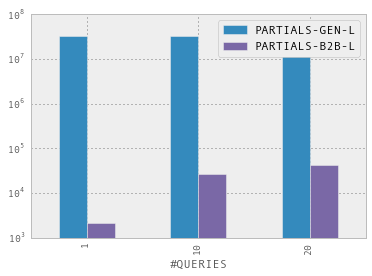

In [68]:
#Comparing Number of Generated Partials - LOGARITHMIC SCALE
DF2[['PARTIALS-GEN-L','PARTIALS-B2B-L']].plot(kind='bar', logy=True)

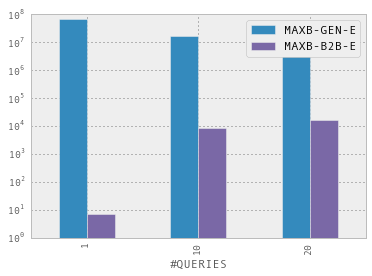

In [69]:
#MAX MEMORY BUGGER ALLOCATED
DF2[['MAXB-GEN-E','MAXB-B2B-E']].plot(kind='bar', logy=True)

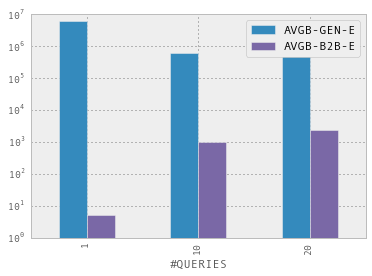

In [70]:
#NOT SO GOOD TO SHOW
#MAX MEMORY BUFFERS ALLOCATED
DF2[['AVGB-GEN-E','AVGB-B2B-E']].plot(kind='bar', logy=True)

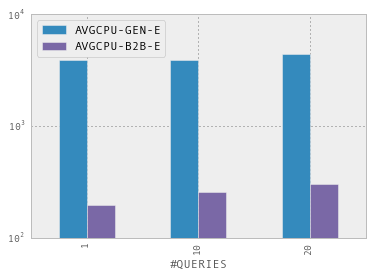

In [71]:
#Comparing Execution Time

#ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', logy=True)
ax = DF2[['AVGCPU-GEN-E','AVGCPU-B2B-E']].plot(kind='bar', logy=True)
#ax.set_ylim(38545954000, 91545954000)

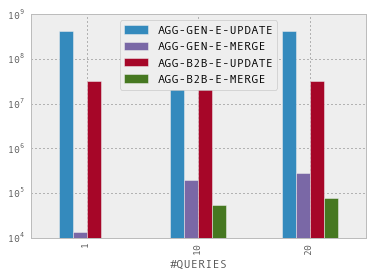

In [72]:
df_b2b_agg = DF2[['AGG-GEN-E-UPDATE','AGG-GEN-E-MERGE','AGG-B2B-E-UPDATE','AGG-B2B-E-MERGE']].plot(kind='bar', logy=True)
#FIXME - STACK MERGES AND UPDATES PER TECHNIQUE